## Time-Dependent Hamiltonian for a Two-Level System

We consider a two-level system described by the Hamiltonian:

$$
\hat{H}(t) = -\frac{\Delta}{2} \, \hat{\sigma}_x - \frac{\epsilon(t)}{2} \, \hat{\sigma}_z.
$$

### Explanation of Terms:
- **Δ**: Time-independent coupling strength between the two basis states.
- **ε(t)**: Time-dependent bias or detuning term.
- **\( \hat{\sigma}_x \)** and **\( \hat{\sigma}_z \)**: Pauli matrices given by:
  $$
  \hat{\sigma}_x = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}, \quad
  \hat{\sigma}_z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}.
  $$

### Harmonic Driving Assumption:
For definiteness and simplicity in the algebra, we assume harmonic driving, i.e., we assume that \( \epsilon(t) \) can be expressed as:

$$
\epsilon(t) = \epsilon_0 + A \cos(\omega t + \varphi),
$$

where:
- **\( \epsilon_0 \)**: The static bias term.
- **A**: Amplitude of the oscillating driving term.
- **ω**: Frequency of the driving term.
- **\( \varphi \)**: Phase of the oscillation.

This Hamiltonian represents a qubit subject to both transverse and longitudinal fields, commonly used in quantum control and Landau-Zener dynamics.


In [2]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Step-1: Define Hamiltonian

delta = 0.2 * 2*np.pi
eps0 = 1.0 * 2*np.pi
A = 2.5 * 2*np.pi

omega = 1.0 * 2*np.pi
T = 2*np.pi / omega

# Define Time-Dependent Hamiltonian
H0 = - delta/2.0 * sigmax() - eps0/2.0 * sigmaz()
H1 = A/2.0 * sigmaz()
args = {'w': omega}
H = [H0, [H1, 'sin(w * t)']]

    ### At t = 0, Floquet modes corresponding to the Hamiltonian
    
    FloquetBasis(H: QobjEvoLike,T: float)

    T : period of the time-dependence of hamiltonian



In [21]:
f_basis = FloquetBasis(H, T, args)

f_energies = f_basis.e_quasi
f_modes_0 = f_basis.mode(0)

f_modes_0

[Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[ 0.72964233+0.j        ]
  [-0.39993746+0.55468198j]],
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.39993746+0.55468198j]
  [0.72964233+0.j        ]]]

### To find the floquet modes at t = 0, we obtain the Floquet mode at some later time t using-:

Floquet mode at some later time using 
    FloquetBasis.mode:

In [33]:
f_modes_t = f_basis.mode(2.5)
f_modes_t 

[Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-0.61110146-0.39866365j]
  [ 0.03189271+0.6830848j ]],
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-0.03189271+0.6830848j ]
  [-0.61110146+0.39866365j]]]

### Our Aim is to find the wave-function solution for some given initial state |\psi> 

For that decompose \psi_0 into floquet states  ψ=∑αcαψα(0)
.using -:

    to_floquet_basis(
    lab_basis: QobjOrData,
    t: float = 0,
    )


output = The state in the Floquet Basis

In [55]:

psi0 = rand_ket(2)

psi0 = basis(2,0)

psi0

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]

In [56]:
f_coeff = f_basis.to_floquet_basis(psi0)
f_coeff

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.72964233+0.j        ]
 [0.39993746-0.55468198j]]

### Given this decomposition 

Now we aim to evaluate the wavefunction at an arbitrary time t using the function-:

    from_floquet_basis(
    lab_basis: QobjOrData,
    t: float = 0,

    output : State in floquet basis


In [52]:
# t = 10 * np.random.rand()

# psi_t = f_basis.from_floquet_basis(f_coeff, t)
# psi_t

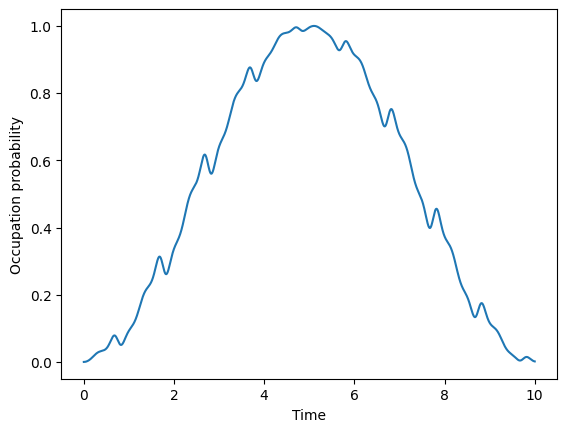

In [61]:
tlist  = np.linspace(0.0, 10 * T, 10001)
# calculate the wavefunctions using the from the floquet modes coefficients
p_ex = np.zeros(len(tlist))

for i, t in enumerate(tlist):
    psi_t = f_basis.from_floquet_basis(f_coeff, t)
    p_ex[i] = expect(num(2), psi_t)

plt.plot(tlist, p_ex)
plt.xlabel('Time')
plt.ylabel('Occupation probability')
plt.show()


In [60]:
num(2)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dia, isherm=True
Qobj data =
[[0. 0.]
 [0. 1.]]

### Floquet Hamiltonian and absorption probability for a two-level System

## **Mathematical Explanation of the `floquet` Function**  

The function `floquet` constructs the **Floquet Hamiltonian** for a quantum system interacting with a periodic drive. It calculates the system's **Floquet spectrum** and determines the transition probabilities based on the overlap between eigenstates.

---

## **1. Inputs and Their Mathematical Meaning**
The function takes the following inputs:

1. $H_0$ - The **unperturbed system Hamiltonian** (e.g., a two-level atom Hamiltonian).  
2. $H_{\text{int}}$ - The **interaction Hamiltonian**, which describes how the system interacts with an external periodic drive.  
3. $\omega$ - The **driving frequency**, which determines the photon energy.  
4. `n_ph` - The **number of photon states** considered in the Floquet analysis.  
5. `measvec` - A measurement vector (not used in this code snippet).  

---

## **2. Initialization**
```python
# Overlap probability
overlap_prob = 0
```
This initializes `overlap_prob`, which will later store the transition probability.

---

## **3. Spectral Decomposition of** $H_0$
```python
evals_0, evecs_0 = eigen_sorter(H0)
```
- Here, `eigen_sorter(H0)` finds the **eigenvalues** $\lambda_i$ and **eigenvectors** $|v_i\rangle$ of $H_0$.
- This step helps us express the system in its **energy eigenbasis**, which simplifies further calculations.

Mathematically,  
\[ H_0 |v_i\rangle = \lambda_i |v_i\rangle \]
where $\lambda_i$ are the energy levels of the system.

---

## **4. Atom Hamiltonian in the Floquet Space**
```python
H_atom = np.kron(np.eye(n_ph), H0)
```
- The system is **extended** into the Floquet space using the Kronecker product ($\otimes$).  
- Here, $H_0$ is **repeated** across $n_{\text{ph}}$ photon states.  
- The Floquet space consists of states labeled as $|v_i, n\rangle$, where:
  - $|v_i\rangle$ is an eigenstate of $H_0$,
  - $n$ is the photon number.

Mathematically,  
\[ H_{\text{atom}} = I_{\text{ph}} \otimes H_0 \]
where $I_{\text{ph}}$ is the **identity matrix of size** $n_{\text{ph}}$.

---

## **5. Photon Range and System Dimension**
```python
max_ph = int(np.floor(n_ph/2))
dim = len(H0)
```
- The **photon range** is set from $-\lfloor n_{\text{ph}}/2 \rfloor$ to $\lfloor n_{\text{ph}}/2 \rfloor$.  
- `dim` is the number of levels in $H_0$ (e.g., for a two-level system, `dim = 2`).

---

## **6. Photon Hamiltonian**
```python
H_ph = omega * np.kron(np.diag([k for k in range(-max_ph, max_ph+1)]), np.eye(dim))
```
- This term represents the **energy contribution from the photon number states**.
- The diagonal matrix contains photon numbers $k \in [-\max_{\text{ph}}, \max_{\text{ph}}]$, each multiplied by $\omega$ (photon energy).
- The Kronecker product ensures that the Hamiltonian applies to the entire system.

Mathematically,  
\[ H_{\text{ph}} = \omega \sum_{k=-\max_{\text{ph}}}^{\max_{\text{ph}}} k |k\rangle \langle k| \otimes I_{\text{dim}} \]
where $|k\rangle$ represents the **photon number state**.

---

## **7. Interaction Term Preparation**
```python
temp_v = np.array([int(k==1) for k in range(n_ph)])
```
- This creates a Toeplitz matrix template for the **interaction Hamiltonian**.
- It ensures that only adjacent photon-number states couple, which is necessary for a **one-photon transition**.

---

## **8. Interaction Hamiltonian**
```python
H_int = np.kron(sp.linalg.toeplitz(temp_v), Hint)
```
- The **interaction term couples the system and photon states**.
- The Toeplitz matrix enforces **selection rules** where the photon number changes by $\pm 1$.
- $H_{\text{int}}$ is the system-operator part of the interaction.

Mathematically,  
\[ H_{\text{int}} = \sum_k |k+1\rangle \langle k| \otimes H_{\text{int}} + |k\rangle \langle k+1| \otimes H_{\text{int}}^\dagger \]
This ensures that **photon absorption and emission** occur properly.

---

## **9. Full Floquet Hamiltonian**
```python
H = H_atom + H_ph + H_int
```
- The total **Floquet Hamiltonian** is constructed.
- It includes:
  1. **Atomic system energy** $H_{\text{atom}}$,
  2. **Photon energy contribution** $H_{\text{ph}}$,
  3. **System-photon interaction** $H_{\text{int}}$.

Mathematically,  
\[ H_F = H_{\text{atom}} + H_{\text{ph}} + H_{\text{int}} \]
This Hamiltonian describes the **time-independent representation** of a periodically driven system.

---

## **10. Constructing the Initial State** $|\psi_g\rangle$
```python
psi_g = np.kron(np.array([int(k==max_ph) for k in range(n_ph)]), evecs_0[-1])
```
- The **initial state** is constructed as:
  - The **highest photon number state** ($k = \max_{\text{ph}}$).
  - The **ground state** $|g\rangle$ of $H_0$.

Mathematically,  
\[ |\psi_g\rangle = |n = \max_{\text{ph}}\rangle \otimes |g\rangle \]

---

## **Summary of Key Terms**

| Term | Mathematical Expression | Meaning |
|------|-------------------------|---------|
| $H_0$ | $\frac{\delta}{2} \sigma_z + \varepsilon \sigma_x$ | System Hamiltonian (without driving) |
| $H_F$ | $H_{\text{atom}} + H_{\text{ph}} + H_{\text{int}}$ | Full Floquet Hamiltonian |
| $|\psi_g\rangle$ | $|n = \max_{\text{ph}}\rangle \otimes |g\rangle$ | Initial state |

This function **constructs and diagonalizes** the Floquet Hamiltonian, allowing one to analyze **multi-photon transitions** and **Floquet eigenstates**.


In [ ]:
# input
measvec = np.array([1,0])
epsilon = 0.2
Deltas = np.linspace(-6,6,600)
omega = 1.5
n_ph = 13
Vs = [0.05,0.2,1]
# define sigmax and sigmaz
sx = sigmax()
sz = sigmaz()

#define the Hamiltonian     
# define Hamiltonian: H0 = 0.5*delta*sigma_z + epsilon*sigma_x
H0 = 0.5 * Deltas[0] * sz + epsilon * sx
#Interaction Hamiltonian: Hint = 0.5*Vstr*sigma_z
Hint = Vs[0] * sz
# Total Hamiltonian: H = H0 + Hint*cos(omega*t)
H = [H0, [Hint, 'cos(omega*t)']]





Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [43]:
max_ph = int(np.floor(n_ph/2))

max_ph

temp_v = np.array([int(k==1) for k in range(n_ph)])

temp_v

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# what is max_ph?
#  Define the absorption as the probability of measuring in the state measvec
10 measvec = np.asarray([1, 0])



